# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

Null Hypothesis(Ho):
There isn't difference in average weight loss.
Alternative Hypothesis (H₁):
There is a difference in average weight loss.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats


diet1 = [2.0, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 = [3.0, 3.1, 2.9, 2.8, 3.0, 3.2]

t_value, p_value = stats.ttest_ind(diet1, diet2)

print(f"t-value: {t_value}")
print(f"p-value: {p_value}")

t-value: -2.836610233340849
p-value: 0.017650691296850235


P-value is less than 0.05 (the standard significance level so we reject the null hypothesis that stated there isn't difference )

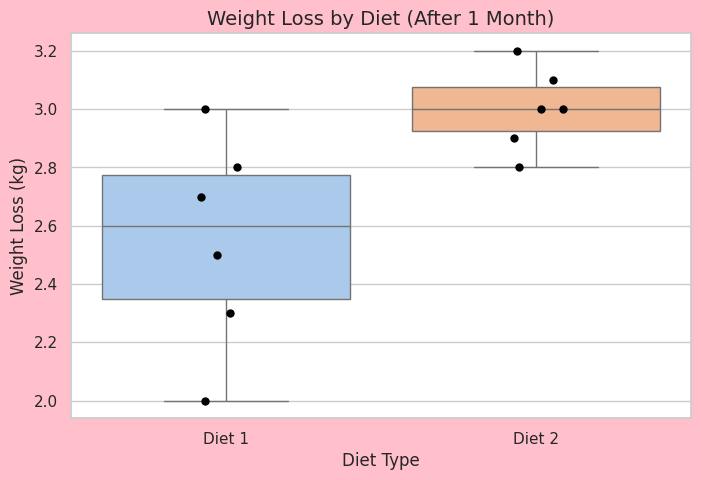

In [10]:


data = pd.DataFrame({
    'Weight Loss': diet1 + diet2,
    'Diet': ['Diet 1'] * len(diet1) + ['Diet 2'] * len(diet2)
})

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Diet', y='Weight Loss', hue='Diet', palette='pastel', legend=False)
sns.stripplot(data=data, x='Diet', y='Weight Loss', color='black', size=6, jitter=True)

plt.gcf().set_facecolor('pink')

plt.title('Weight Loss by Diet (After 1 Month)', fontsize=14)
plt.xlabel('Diet Type')
plt.ylabel('Weight Loss (kg)')

plt.show()

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

Null hypotesys: there isn't significative difference on the fertilizers. Alternative hypostesis: there is significative difference on the ferttilizers.

In [9]:

fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 22, 23, 24]

# ANOVA test
f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print(f"f-value: {f_value}")
print(f"p-value: {p_value}")


data = np.concatenate([fertilizer_1, fertilizer_2, fertilizer_3])
labels = ["F1"] * 5 + ["F2"] * 5 + ["F3"] * 5

result = pairwise_tukeyhsd(data, labels, alpha = 0.05)
print(result)

f-value: 20.315789473684188
p-value: 0.00014047824793190472


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


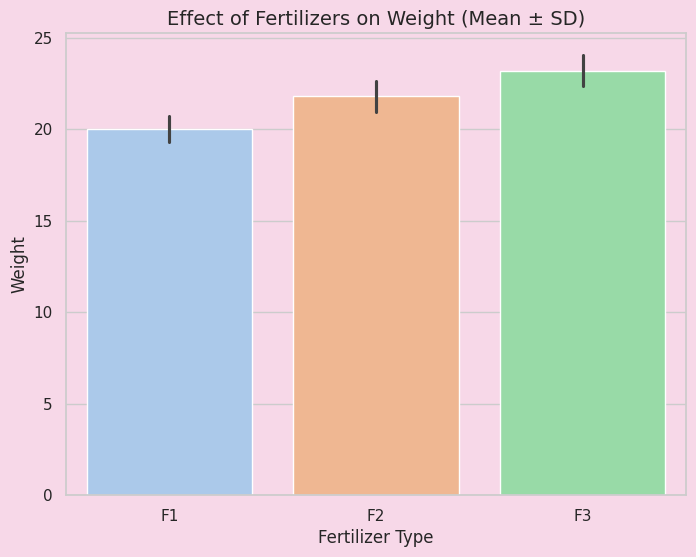

In [ ]:

data = pd.DataFrame({
    'Weight': fertilizer_1 + fertilizer_2 + fertilizer_3,
    'Fertilizer': ['F1']*5 + ['F2']*5 + ['F3']*5
})

sns.set(style="whitegrid", rc={"axes.facecolor": "#f7d8e8", "figure.facecolor": "#f7d8e8"})  # Fondo rosa

plt.figure(figsize=(8, 6))
sns.barplot(x='Fertilizer', y='Weight', data=data, errorbar="sd", palette="pastel", hue='Fertilizer')

plt.title('Effect of Fertilizers on Weight (Mean ± SD)', fontsize=14)
plt.xlabel('Fertilizer Type')
plt.ylabel('Weight')

plt.show()

Fertilizer 3 seems to be the best, as it produces the largest difference in means compared to the other fertilizers. 